# Peter en de Wolf: Introductie tot Reinforcement Learning

In deze tutorial leren we hoe we Reinforcement Learning kunnen toepassen op een probleem van padvinding. De setting is geïnspireerd door [Peter en de Wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), een muzikaal sprookje van de Russische componist [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Het is een verhaal over de jonge pionier Peter, die moedig zijn huis verlaat om in de open plek van het bos een wolf achterna te gaan. We zullen machine learning-algoritmes trainen die Peter helpen om het omliggende gebied te verkennen en een optimale navigatiekaart te bouwen.

Laten we eerst een aantal handige bibliotheken importeren:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Overzicht van Reinforcement Learning

**Reinforcement Learning** (RL) is een leertechniek waarmee we het optimale gedrag van een **agent** in een bepaalde **omgeving** kunnen leren door veel experimenten uit te voeren. Een agent in deze omgeving moet een **doel** hebben, dat wordt gedefinieerd door een **beloningsfunctie**.

## De Omgeving

Voor de eenvoud beschouwen we Peter's wereld als een vierkant bord van grootte `width` x `height`. Elke cel op dit bord kan één van de volgende zijn:
* **grond**, waarop Peter en andere wezens kunnen lopen
* **water**, waarop je uiteraard niet kunt lopen
* **een boom** of **gras** - een plek waar je kunt uitrusten
* **een appel**, die iets vertegenwoordigt dat Peter graag zou vinden om zichzelf te voeden
* **een wolf**, die gevaarlijk is en vermeden moet worden

Om met de omgeving te werken, definiëren we een klasse genaamd `Board`. Om deze notebook niet te veel te belasten, hebben we alle code om met het bord te werken verplaatst naar een aparte module genaamd `rlboard`, die we nu gaan importeren. Je kunt in deze module kijken voor meer details over de interne werking van de implementatie.


Laten we nu een willekeurig bord maken en kijken hoe het eruitziet:


In [4]:
# code block 1

## Acties en Beleid

In ons voorbeeld is Peter's doel om een appel te vinden, terwijl hij de wolf en andere obstakels ontwijkt. Definieer deze acties als een woordenboek en koppel ze aan paren van bijbehorende coördinatenwijzigingen.


In [5]:
# code block 2

De strategie van onze agent (Peter) wordt bepaald door een zogenaamde **policy**. Laten we de eenvoudigste policy bekijken, genaamd **random walk**.

## Random walk

Laten we eerst ons probleem oplossen door een random walk-strategie te implementeren.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Beloningsfunctie

Om ons beleid slimmer te maken, moeten we begrijpen welke zetten "beter" zijn dan andere.


In [8]:
#code block 5

## Q-Learning

Bouw een Q-Tabel, of een multidimensionale array. Aangezien ons bord afmetingen heeft van `breedte` x `hoogte`, kunnen we de Q-Tabel weergeven met een numpy-array met de vorm `breedte` x `hoogte` x `len(acties)`:


In [9]:
# code block 6

Geef de Q-Table door aan de `plot`-functie om de tabel op het bord te visualiseren:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essentie van Q-Learning: Bellman-vergelijking en leeralgoritme

Schrijf een pseudocode voor ons leeralgoritme:

* Initialiseer de Q-Tabel Q met gelijke waarden voor alle toestanden en acties
* Stel de leersnelheid in $\alpha\leftarrow 1$
* Herhaal de simulatie meerdere keren
   1. Begin op een willekeurige positie
   1. Herhaal
        1. Kies een actie $a$ in toestand $s$
        2. Voer de actie uit door naar een nieuwe toestand $s'$ te gaan
        3. Als we een eindspelconditie tegenkomen, of de totale beloning te klein is - beëindig de simulatie  
        4. Bereken de beloning $r$ in de nieuwe toestand
        5. Werk de Q-Functie bij volgens de Bellman-vergelijking: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Werk de totale beloning bij en verlaag $\alpha$.

## Exploiteren vs. Verkennen

De beste aanpak is een balans te vinden tussen verkennen en exploiteren. Naarmate we meer leren over onze omgeving, zullen we eerder de optimale route volgen, maar af en toe toch een onontdekt pad kiezen.

## Python-implementatie

Nu zijn we klaar om het leeralgoritme te implementeren. Voordat we dat doen, hebben we ook een functie nodig die willekeurige getallen in de Q-Tabel omzet in een vector van waarschijnlijkheden voor de bijbehorende acties:


In [10]:
# code block 7

We voegen een kleine hoeveelheid `eps` toe aan de oorspronkelijke vector om deling door 0 te voorkomen in het initiële geval, wanneer alle componenten van de vector identiek zijn.

Het daadwerkelijke leeralgoritme dat we zullen uitvoeren voor 5000 experimenten, ook wel **epochs** genoemd:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Na het uitvoeren van dit algoritme, moet de Q-Tabel worden bijgewerkt met waarden die de aantrekkelijkheid van verschillende acties bij elke stap definiëren. Visualiseer de tabel hier:


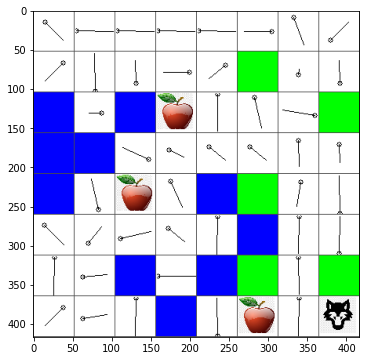

In [43]:
m.plot(Q)

## Het beleid controleren

Omdat de Q-Table de "aantrekkelijkheid" van elke actie in elke staat weergeeft, is het vrij eenvoudig om deze te gebruiken om efficiënte navigatie in onze wereld te definiëren. In het eenvoudigste geval kunnen we gewoon de actie kiezen die overeenkomt met de hoogste waarde in de Q-Table:


In [13]:
# code block 9

2

Als je de bovenstaande code meerdere keren probeert, merk je misschien dat deze soms gewoon "vastloopt", en je de STOP-knop in het notebook moet indrukken om het te onderbreken.

> **Taak 1:** Pas de `walk`-functie aan om de maximale lengte van het pad te beperken tot een bepaald aantal stappen (bijvoorbeeld 100), en kijk hoe de bovenstaande code deze waarde van tijd tot tijd retourneert.

> **Taak 2:** Pas de `walk`-functie aan zodat deze niet terugkeert naar plaatsen waar hij eerder al is geweest. Dit zal voorkomen dat `walk` in een lus terechtkomt, maar de agent kan nog steeds "vast" komen te zitten op een locatie waaruit hij niet kan ontsnappen.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


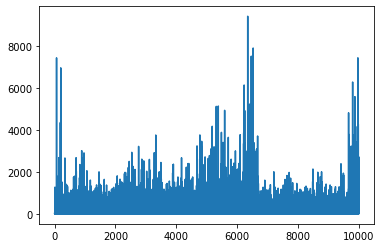

In [57]:
plt.plot(lpath)

## Oefening
## Een realistischer wereld van Peter en de Wolf



---

**Disclaimer**:  
Dit document is vertaald met behulp van de AI-vertalingsservice [Co-op Translator](https://github.com/Azure/co-op-translator). Hoewel we streven naar nauwkeurigheid, dient u zich ervan bewust te zijn dat geautomatiseerde vertalingen fouten of onnauwkeurigheden kunnen bevatten. Het originele document in zijn oorspronkelijke taal moet worden beschouwd als de gezaghebbende bron. Voor cruciale informatie wordt professionele menselijke vertaling aanbevolen. Wij zijn niet aansprakelijk voor eventuele misverstanden of verkeerde interpretaties die voortvloeien uit het gebruik van deze vertaling.
